# 1. Extracción de diversas fuentes de datos con [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)

Pandas es una biblioteca de Python desarrollada originalmente por Wes McKinney en 2008 para el análisis cuantitativo financiero. Pandas facilita la carga y manipulación de datos y está integrado con bibliotecas de análisis y visualización.

El núcleo de Pandas es un Data Frame, las cuales son estructuras de datos bidimensionales. Suelen tener columnas, etiquetadas como nombres de variables (o campos) y filas, conocidas como índice. El índice predeterminado es el número de fila, pero puede especificar una columna como índice.

<img src="./img/pandas_df.png" />

In [19]:
# importación de la libreria pandas

import pandas as pd

## 1.1 Lectura de archivos de texto plano

**Lectura de archivos CSV**

Pandas cuenta con múltiples formas de lectura de información de datos, uno de ellos es a partir de la lectura del tipo csv

In [11]:
# df convensión para referirse a dataset
# shif + tab : muestra propiedades de función

path = 'https://assets.datacamp.com/production/repositories/4412/datasets/61bb27bf939aac4344d4f446ce6da1d1bf534174/'
file = 'vt_tax_data_2016.csv'
df = pd.read_csv(path+file)

# head () -> muestra primeros 10 elementos
df.head()

STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   24499   34600   90583  
3   21573   21300   67045  
4   67761   23320  103034  

[5 rows x 147 columns]

In [12]:
# es posible especificar la cantidad de elementos a leer 
# head(n) -> n : cantidad de elementos a leer
df.head(2)

STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  

[2 rows x 147 columns]

In [27]:
# muestra cantidad e columnas
columns = [c for c in df.columns]
print(f'cantidad columnas {len(columns)}')

cantidad columnas 147


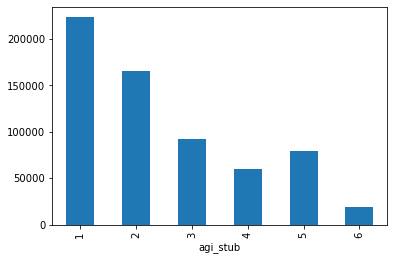

In [17]:
# Graficando el número total de taxes retirnados por grupo

import matplotlib.pyplot as plt

counts = df.groupby("agi_stub").N1.sum()
counts.plot.bar()
plt.show()

El método **read_csv** tambien nos sirve para cargar otro tipo de archivos como .txt o .tsv

In [32]:
df_tsv = pd.read_csv('./datasets/vt_tax_data_2016.tsv',sep='\t')
df_tsv.head()

STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   24499   34600   90583  
3   21573   21300   67045  
4   67761   23320  103034  

[5 rows x 147 columns]

### Modificando importación de archivos de texto plano

Para ello debemos conocer las dimensiones del dataframe importado

In [34]:
# shape -> nos indica la cantidad de filas y columnas compuestas en el dataframe
df.shape

(1476, 147)

### - Limitando la cantidad de columnas importadas

**Usecols** puede tomar una lista de todos los nombres de columna o todos los números de columna para importar. También puede usar una función para seleccionar columnas, por ejemplo, todas las columnas que comienzan con la letra N.

In [35]:
# seleccionando las columnas a ser ingestadas en el dataframe
cols = ['zipcode','agi_stub','mars1','MARS2','NUMDEP']

In [ ]:
# Creando un dataframe con las columnas seleccionadas
data = pd.read_csv(path+file, usecols=cols)
data.head(2)

In [ ]:
# View counts of dependents and tax returns by income level
print(data.groupby("agi_stub").sum())

In [42]:
# seleccionando las columnas por posición
cols_number=[0,1,2,3,4]

In [ ]:
data = pd.read_csv(path+file, usecols=cols_number)
data.head(2)

### - Limitando el número de filas importadas

Podemos reducir la cantidad de columnas importadas con el atributo **nrows**

In [47]:
df_tsv_primeros100 = pd.read_csv('./datasets/vt_tax_data_2016.tsv',sep='\t',nrows=100, usecols=cols)
df_tsv_primeros100.head()

zipcode  agi_stub  mars1  MARS2  NUMDEP
0        0         1  85090  14170   26200
1        0         2  51960  18820   32310
2        0         3  19540  22650   23610
3        0         4   5830  22190   18860
4        0         5   3900  33800   30330

In [49]:
df_tsv_primeros100.shape

(100, 5)

Obteniendo los siguientes 500 datos

In [53]:
df_tsv_siguientes500 = pd.read_csv('./datasets/vt_tax_data_2016.tsv',sep='\t',
                                 nrows=500, # cantidad de datos que se quieren tener
                                 skiprows=100, # a partir de la fila
                                 header = None,
                                 usecols=cols_number
                                )
df_tsv_siguientes500.head(2)

0   1     2  3   4
0  50  VT  5046  4  60
1  50  VT  5046  5  50

Asignando nombre a las columnas del nuevo dataframe

In [56]:
names_columns= list(df_tsv_primeros100)

df_tsv_siguientes500 = pd.read_csv('./datasets/vt_tax_data_2016.tsv',sep='\t',
                                 nrows=500, # cantidad de datos que se quieren tener
                                 skiprows=100, # a partir de la fila
                                 header = None, # excluye a la cabecera
                                 usecols=cols_number, # selecciono columnas que requiero
                                 names = names_columns # estable nombre a las columnas
                                )
df_tsv_siguientes500.head(2)

zipcode agi_stub  mars1  MARS2  NUMDEP
0       50       VT   5046      4      60
1       50       VT   5046      5      50

## Manejo de Errores y datos perdidos

- **Especificando tipo de dato**:

    Cuando realizamos la carga de un archivo, pandas infiere el tipo de dato de la columna a ser cargada.


In [116]:
df.dtypes

zipcode     int64
agi_stub    int64
mars1       int64
MARS2       int64
NUMDEP      int64
dtype: object

In [118]:
df.head(2)

zipcode  agi_stub  mars1  MARS2  NUMDEP
0        0         1  85090  14170   26200
1        0         2  51960  18820   32310

In [119]:
path = 'https://assets.datacamp.com/production/repositories/4412/datasets/61bb27bf939aac4344d4f446ce6da1d1bf534174/'
file = 'vt_tax_data_2016.csv'
tipo_dato = {'zipcode':str}
df = pd.read_csv(path+file, dtype=tipo_dato)

In [121]:
df.head(2)

STATEFIPS STATE zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT       0         1  111580  85090  14170  10740  45360   
1         50    VT       0         2   82760  51960  18820  11310  35600   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  

[2 rows x 147 columns]

In [123]:
df.dtypes

STATEFIPS     int64
STATE        object
zipcode      object
agi_stub      int64
N1            int64
              ...  
A85300        int64
N11901        int64
A11901        int64
N11902        int64
A11902        int64
Length: 147, dtype: object

- **Customerizando los valores nulos**:

    La falta de datos es otro problema común. Pandas reconoce automáticamente algunos valores, 
    como `"N/A"` o `"null"` como datos faltantes, lo que permite el uso de prácticas funciones de 
    limpieza de datos. 
    Pero a veces los valores perdidos se representan de formas que los pandas no captan, 
    como con códigos ficticios.

Para nuestro dataset, aquellos valores cuyo **zipcode** se marca como 0 debe ser reemplado por null

In [142]:
tax_data = pd.read_csv("./datasets/vt_tax_data_2016.tsv",
                       sep='\t',
                       na_values={"zipcode" : 0})

In [143]:
tax_data.head(2)

STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT      NaN         1  111580  85090  14170  10740  45360   
1         50    VT      NaN         2   82760  51960  18820  11310  35600   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  

[2 rows x 147 columns]

In [144]:
tax_data[tax_data.zipcode.isna()]

STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT      NaN         1  111580  85090  14170  10740  45360   
1         50    VT      NaN         2   82760  51960  18820  11310  35600   
2         50    VT      NaN         3   46270  19540  22650   3620  24140   
3         50    VT      NaN         4   30070   5830  22190    960  16060   
4         50    VT      NaN         5   39530   3900  33800    590  22500   
5         50    VT      NaN         6    9620    600   8150      0   7040   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   
5   26430  ...    9600  894432    3350    4939    4990   20428    3900   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   24499   34600   90583  
3   21573   21300   67045  
4   67761   23320  103034  
5   93123    2870   39425  

[6 rows x 147 columns]

- **Lineas con Errores**:

    Un último problema al que puede enfrentarse son las líneas que pandas simplemente no pueden analizar. Por ejemplo, un registro podría tener más valores que columnas, como el segundo registro en esta versión corrupta de los datos fiscales.

In [ ]:
tax_data = pd.read_csv("us_tax_data_2016_corrupt.csv")

- Set <code>error_bad_lines = False</code> para escapar de las lineas que no pueden ser leidas
- Set <code>warn_bad_lines = True</code> para mostrar un mensaje de alerta sobre la linea que no puede ser leida

In [ ]:
tax_data = pd.read_csv("us_tax_data_2016_corrupt.csv",
                       error_bad_lines=False,
                       warn_bad_lines=True)

REFERENCIAS
--------------------------

- TextFilePandas: https://medium.com/@fiorott/streamlined-data-ingestion-with-pandas-171d34247bf0
- IngestaGranVolumenDatos: https://medium.com/towards-artificial-intelligence/efficient-pandas-using-chunksize-for-large-data-sets-c66bf3037f93